In [4]:
# add source directory to path
import sys
sys.path.append('../')

import numpy as np
import pandas as pd

In [5]:
def heatcurve_exp(T_amb, T_room = 20, T_sup_nom = 35, T_ret_nom = 20, T_amb_nom = -12.1, T_lim = 20, n = 1.3):
    Qdot_rel = (T_lim - T_amb) / (T_lim - T_amb_nom)
    T_sup = T_room + ((T_sup_nom + T_ret_nom)/2 - T_room) * np.power(Qdot_rel, 1/n) + (T_sup_nom - T_ret_nom)/2 * Qdot_rel
    T_ret = T_sup - Qdot_rel * (T_sup_nom - T_ret_nom)
    return T_sup, T_ret

In [6]:
from src.controller.heatcurve.heatcurve import Heatingcurve

HC = Heatingcurve(T_sup_nom = 35,
                  T_ret_nom = 20,
                  T_amb_lim = 20,
                  heatingexp =  1.3,
                  )

T_amb = np.linspace(-20,20,41)

shift = -5
offset = 10

T_sup_nom, T_ret_nom = HC.calc(T_amb=T_amb)
T_sup_v, T_ret_v     = HC.calc(T_amb=T_amb, shift_T_lim = shift)
T_sup_h, T_ret_h     = HC.calc(T_amb=T_amb, offset_T_flow_nom = offset)
#print(T_sup, T_ret)

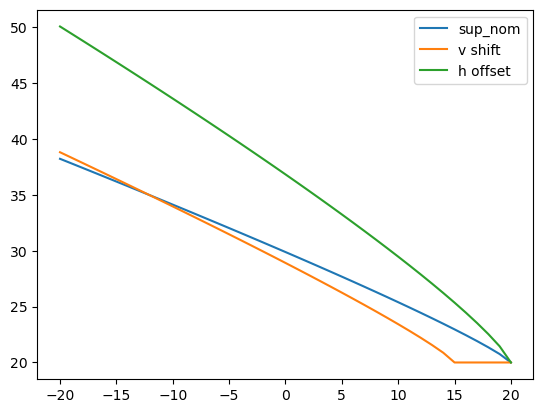

In [7]:
import matplotlib.pyplot as plt
plt.plot(T_amb, T_sup_nom, label = "sup_nom")
#plt.plot(T_amb, T_ret_nom, label = "ret_nom")
plt.plot(T_amb, T_sup_v, label="v shift")
plt.plot(T_amb, T_sup_h, label = "h offset")
plt.legend()